In [2]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)          # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [3]:
from os.path import join
MY_GOOGLE_DRIVE_PATH = 'My Drive/PortfolioProjects'
GIT_USERNAME = "shashanksharad"
GIT_TOKEN = "6f6a371b982898c5836f8a2986ef4ae64320e0f2"
GIT_REPOSITORY = "Autoencoders_TimeSeriesAnomalyDetection"
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"

In [5]:
%cd "{PROJECT_PATH}"
%cd "{GIT_REPOSITORY}"

/content/drive/My Drive/PortfolioProjects
/content/drive/My Drive/PortfolioProjects/Autoencoders_TimeSeriesAnomalyDetection


Detecting anomalies in real-time time-series is a challenging task. The conventional way has been using some threshold value of the time series and using it to flag an anomaly whenever the time series breached the threshold value. These threshold values can be a static (most basic) or dynamic (calculated by analysing the time series in a relatively small recent time window). However choosing an accurate threshold has been very difficult.

Autoencoder networks overcome this challenge by presenting us with an unsupervised method which can calculate the threshold itself. UNder the hood, autoencoders try to reconstruct the original signal that they are fit through a sequence of encoding and decoding units. During this process of reconstruction they try to learn only the most important features or a low dimensional representation of the data by minimizing the reconstruction loss.

The architecture as discussed earlier is composed of two important units: the encoder and the decoder. These steps here will be achieved by using LSTM layers. At each epoch, the training process feeds the network with training examples (time series), encodes & decodes it back and evaluates the reconstruction error on the training set. We will minimize the L1 loss between the actual time series and its reconstructed version. We also calculate the reconstruction loss for the validation set to tune our networn

Threshold Selection:
Once the model learns to encode the time series and decode it back to itself with an accepteble validation loss, we have a distribution of the training losses. We then try to extract the maximum value of reconstruction loss from the distribution and use it to flag anomalies in future.

In [17]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
files = glob.glob('src/data/**/*.csv', recursive = True)
df_List = []
for i in range(len(files)):
    df = pd.read_csv(files[i])
    df_filename = 
    df_List.append(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

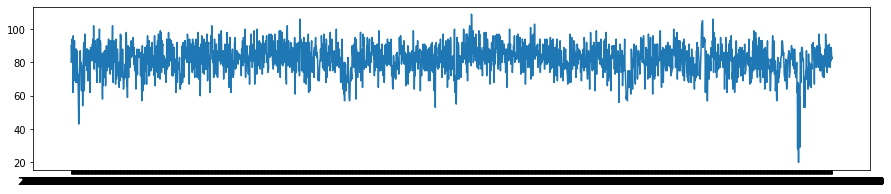

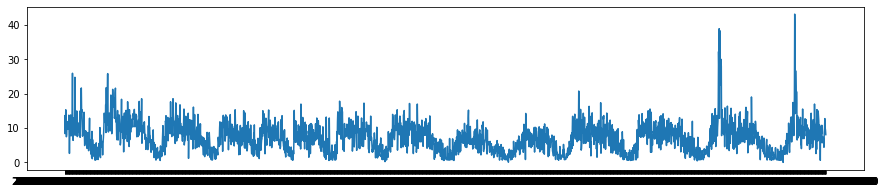

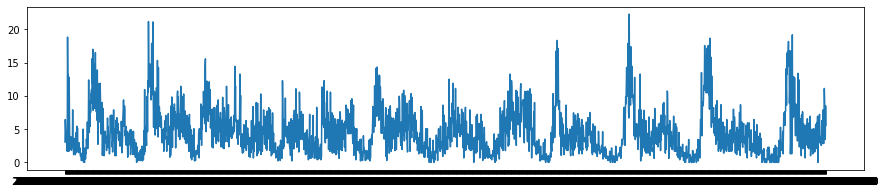

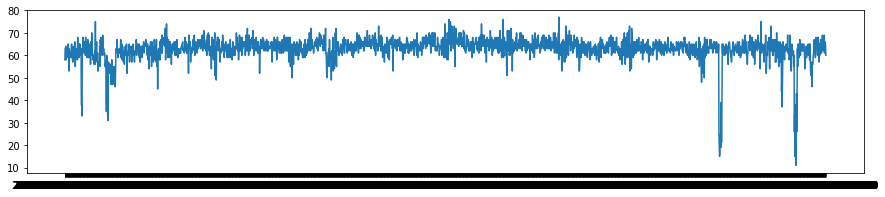

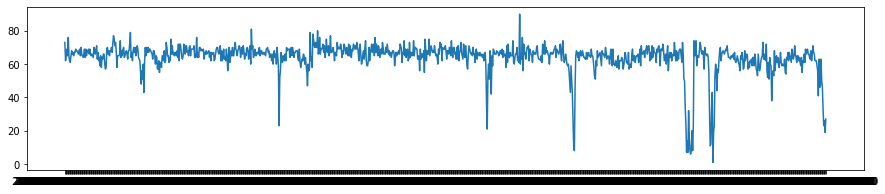

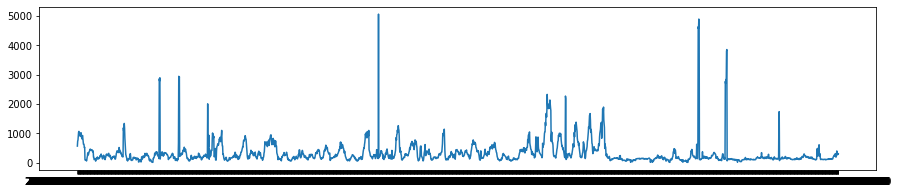

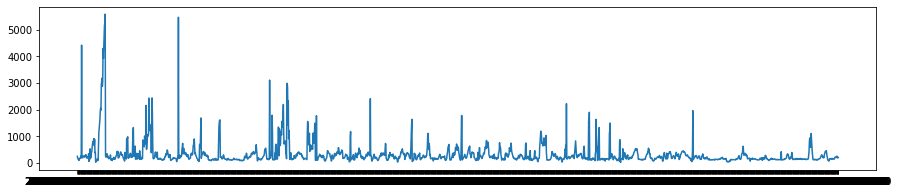

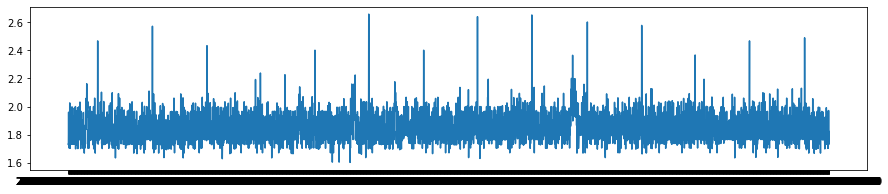

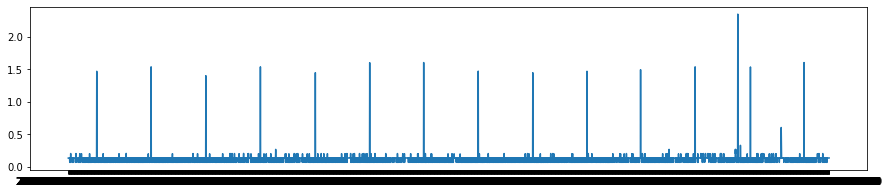

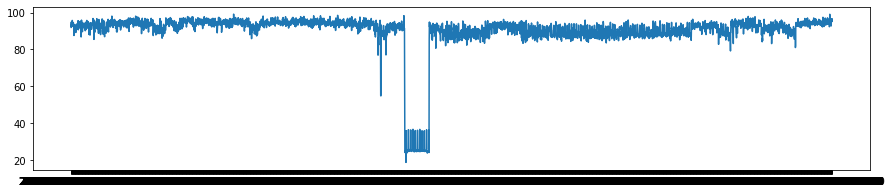

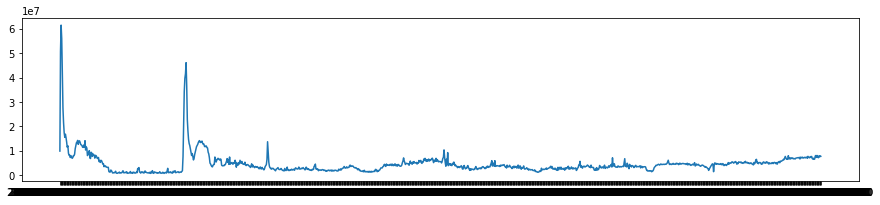

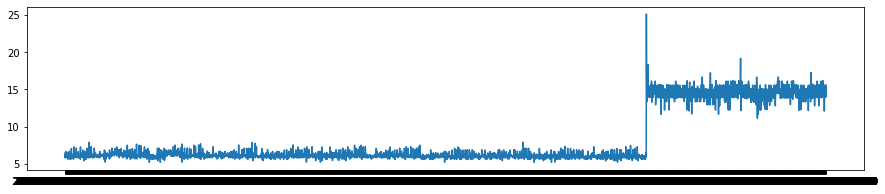

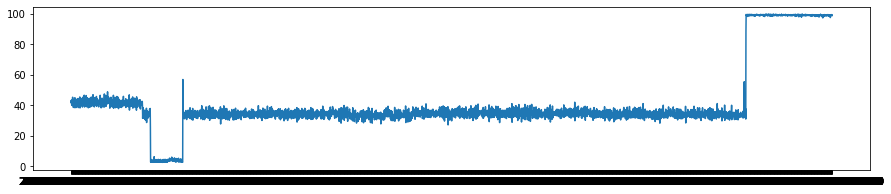

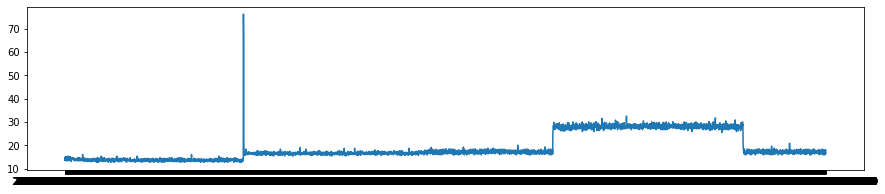

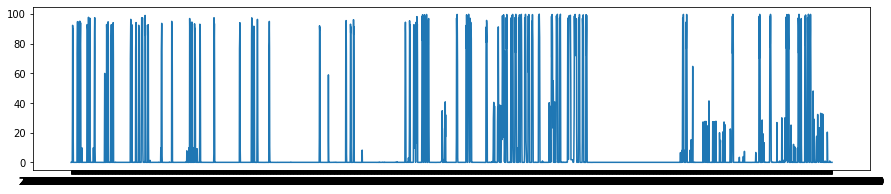

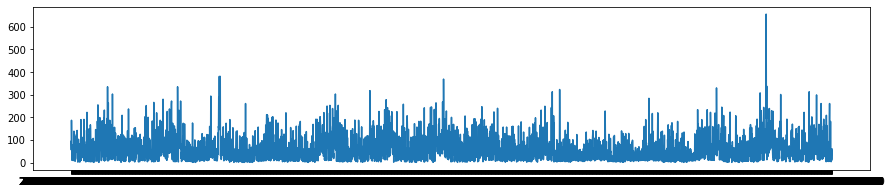

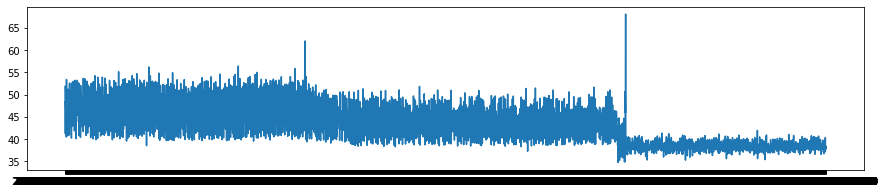

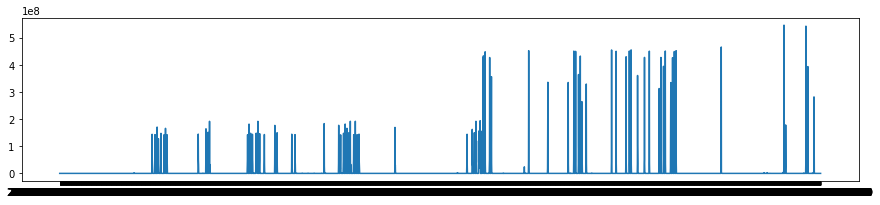

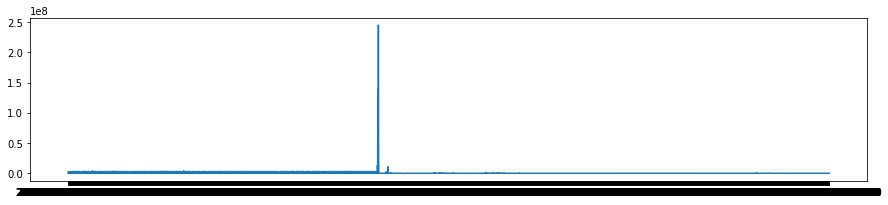

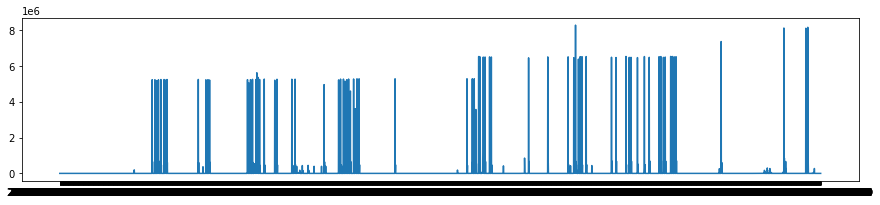

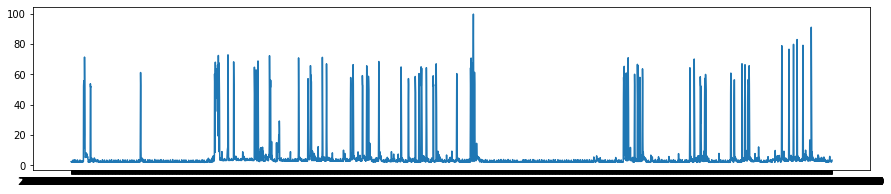

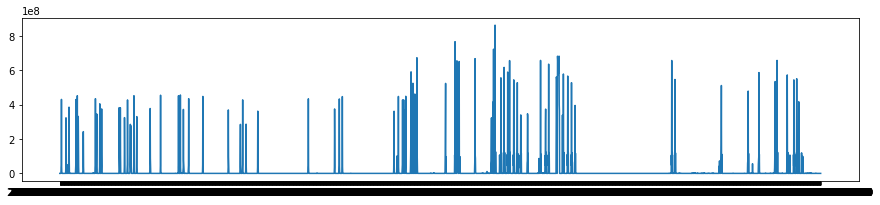

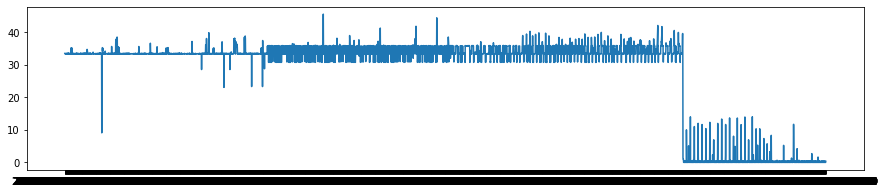

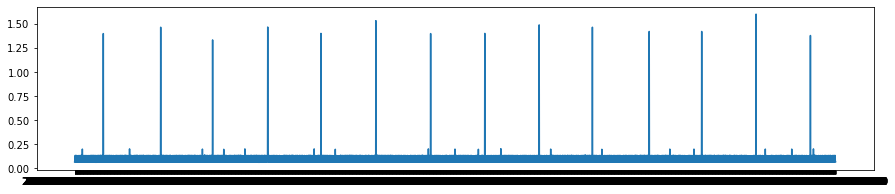

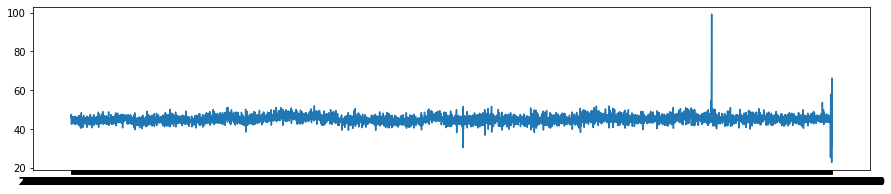

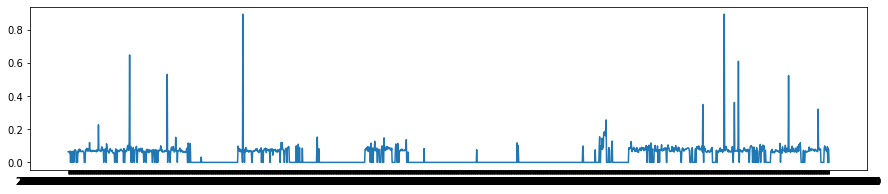

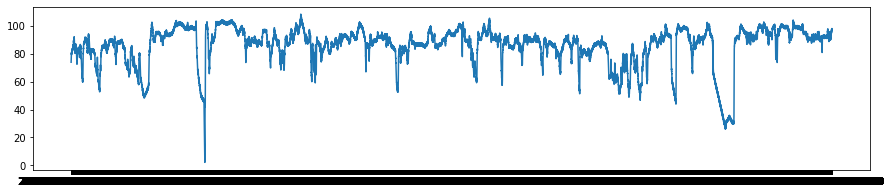

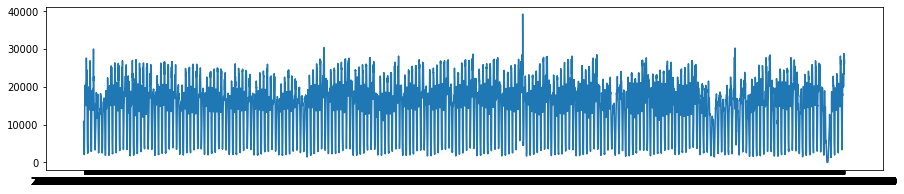

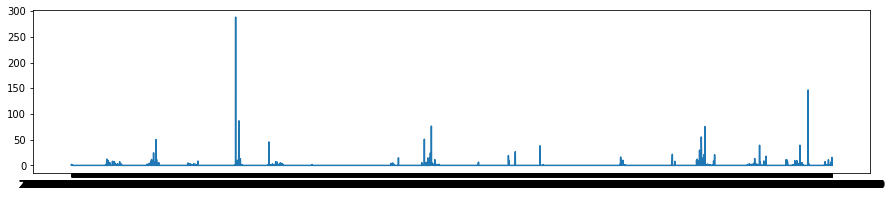

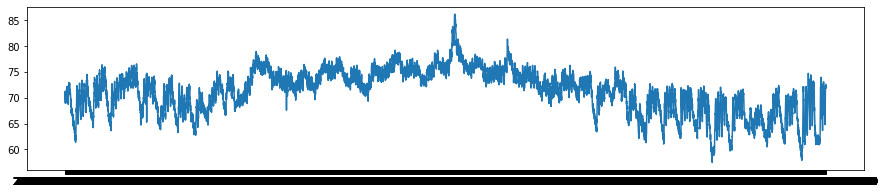

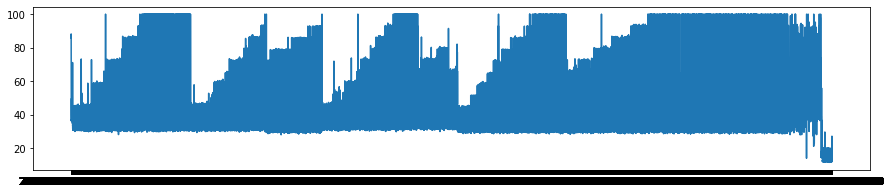

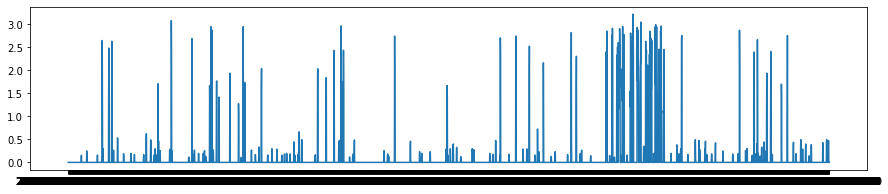

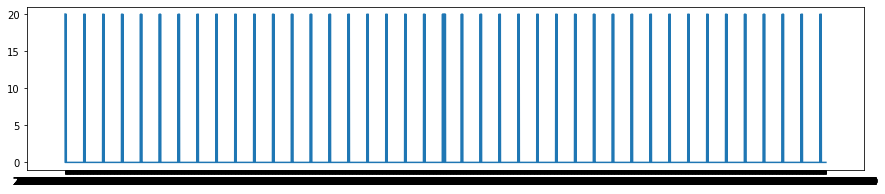

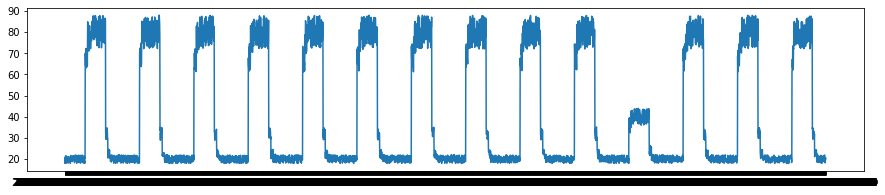

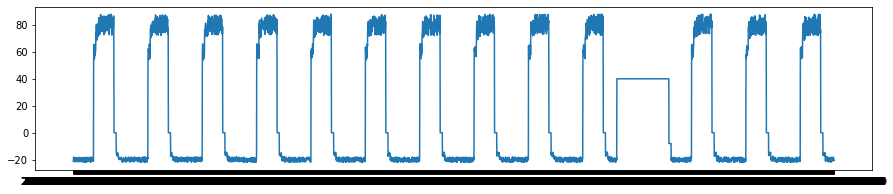

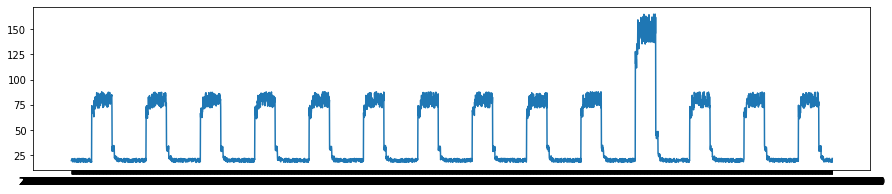

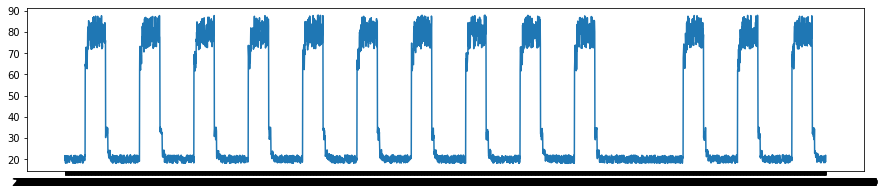

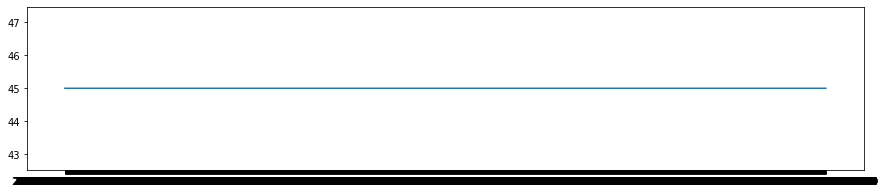

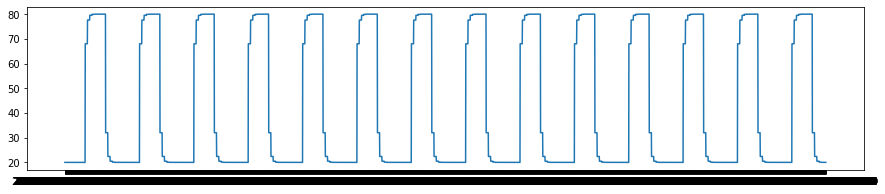

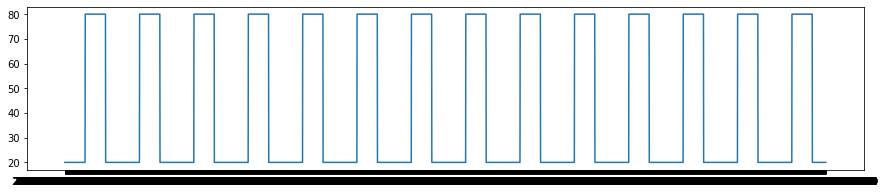

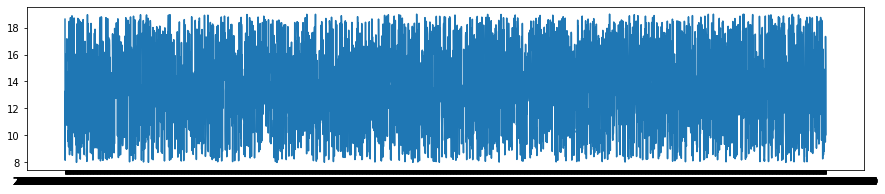

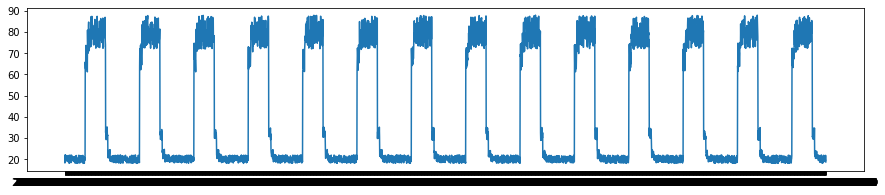

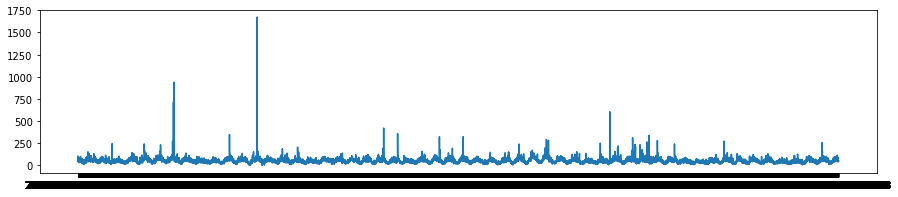

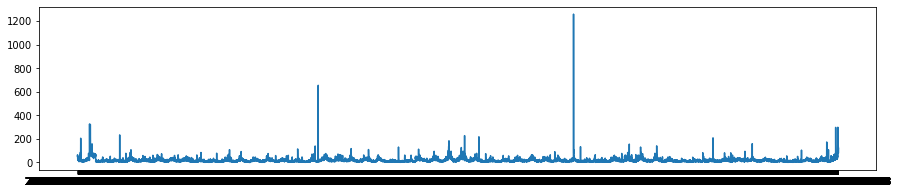

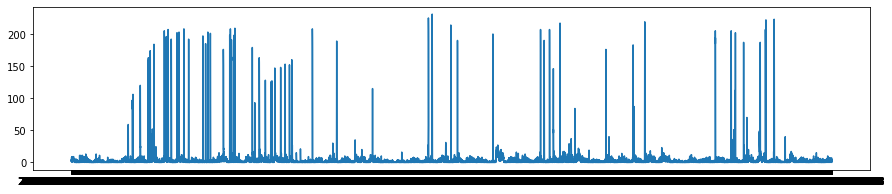

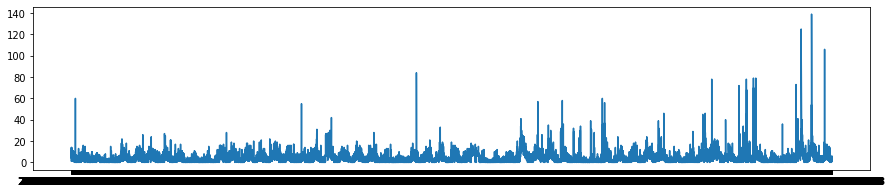

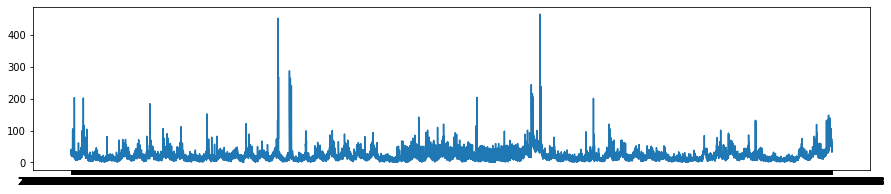

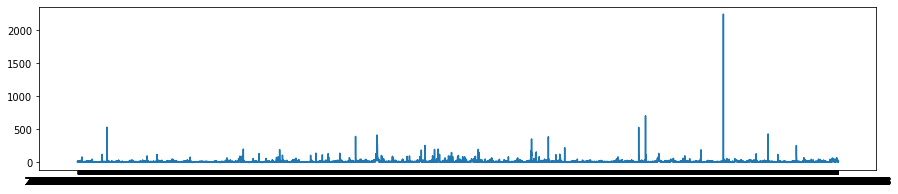

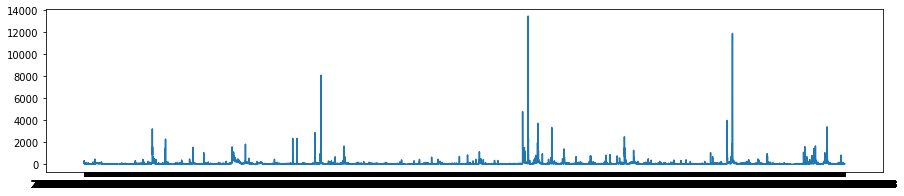

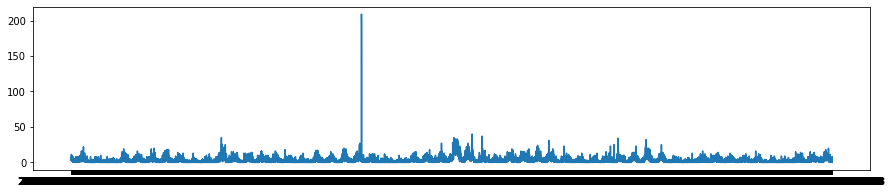

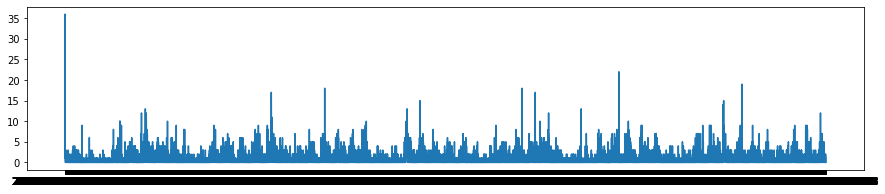

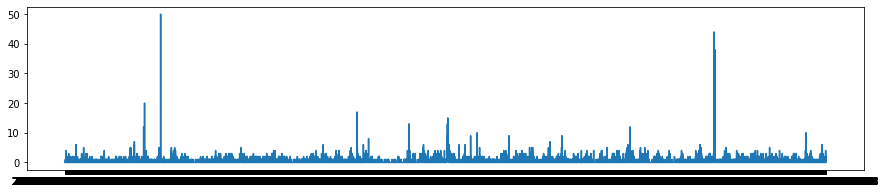

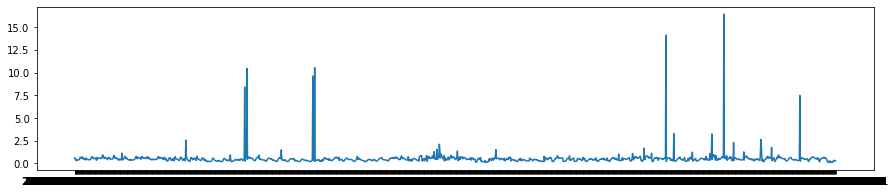

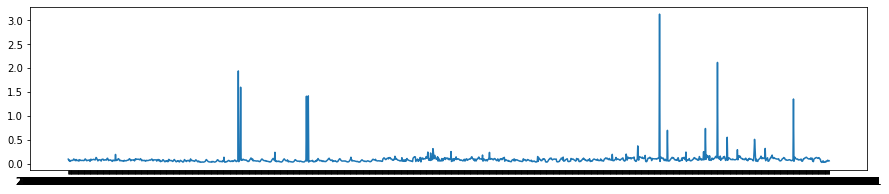

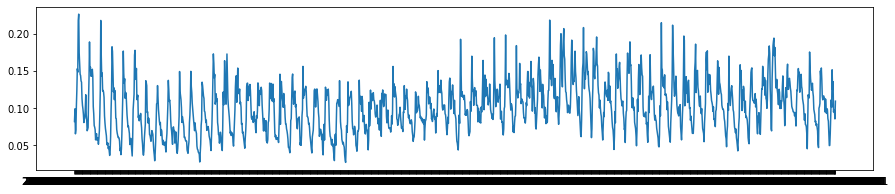

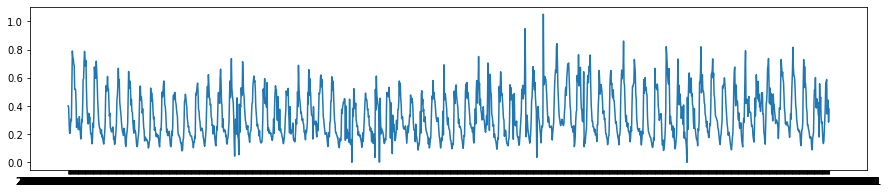

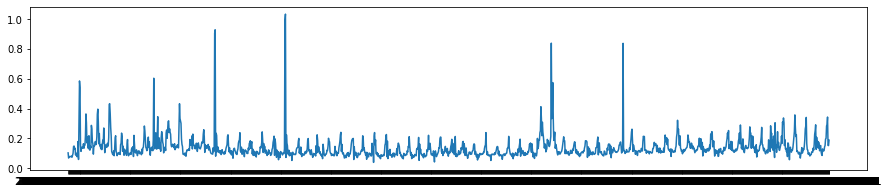

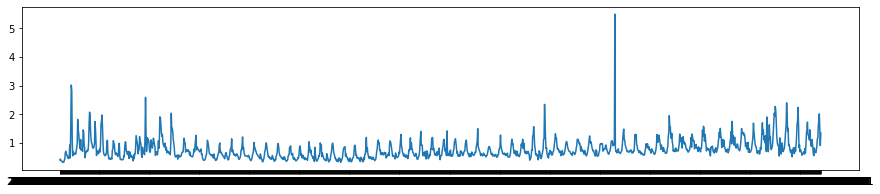

In [19]:
for df in df_List:
  f,ax = plt.subplots(figsize = (15, 3))
  ax.plot(df['timestamp'], df['value'])